# Sieć klasyfikująca irysy na podtawie 4 parametrów

### Ładowanie danych wejściowych

In [23]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data #wejścia
y = iris.target #przypisany typ irysu na podstawie parametrów "data"

### Jakie parametry podajemy na wejściu?

In [24]:
feature_names = iris.feature_names #nazwa parametrów wejściowych
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Jakie informacje są na wyjściu?

In [25]:
iris_types = iris.target_names
iris_types

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Jak w ogóle wyglądają dane?

In [26]:
from pandas import DataFrame
df_X = DataFrame(X)
df_X_labeled = df_X.set_axis([feature_names[0], feature_names[1], feature_names[2], feature_names[3]], axis=1)
# Dodanie jednej kolumny
df_y = DataFrame(iris_types[y])
df_data_pairs = df_X_labeled
df_data_pairs['iris_type'] = df_y #przypisanie typów na wejściu
df_data_pairs

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Kod sieci: 

## Standaryzacja danych

### Dane przed standaryzacją:

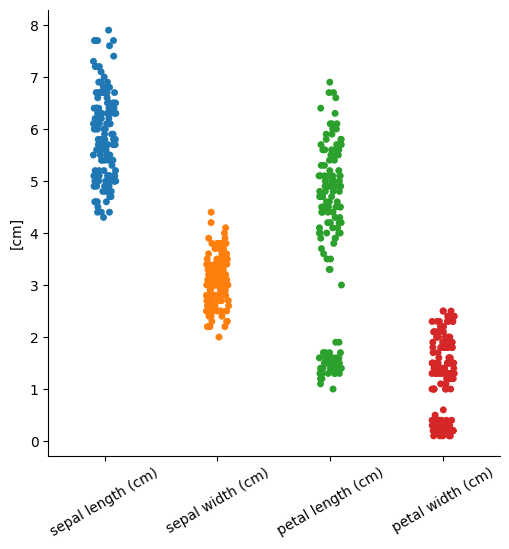

In [27]:
import seaborn as sns
sns.catplot(data=df_X).set_xticklabels(rotation=30, labels=feature_names).set_ylabels("[cm]")

### Dane po standaryzacji (wartość średnia równa 0)

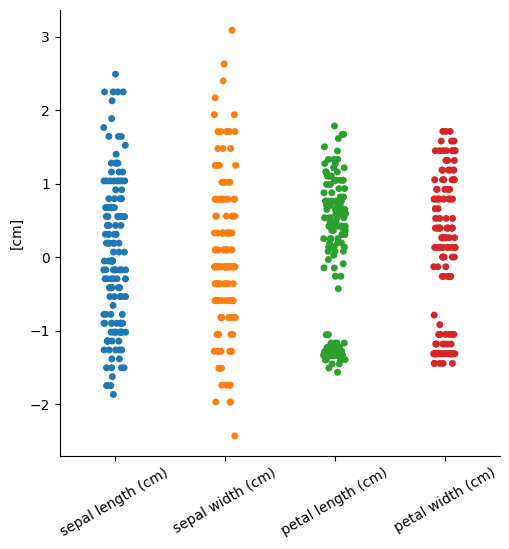

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_X_scaled = DataFrame(X_scaled)
sns.catplot(data=df_X_scaled).set_xticklabels(rotation=30, labels=feature_names).set_ylabels("[cm]")

### Obróbka danych wyjściowych, czyli one-hot encoding klasyfikatora

reprezentacja pojedynczej liczby poprzez pojedynczy wektor, gdzie znaczenie ma to na jakiej pozycji postawimy 1 

In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1, 1))
y_onehot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

### Podzielenie danych na dane testowe i walidacyjne

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot,test_size=0.2, random_state=42)
X_train

array([[-1.50652052e+00,  1.24920112e+00, -1.56757623e+00,
        -1.31544430e+00],
       [-1.73673948e-01,  3.09077525e+00, -1.28338910e+00,
        -1.05217993e+00],
       [ 1.03800476e+00,  9.82172869e-02,  3.64896281e-01,
         2.64141916e-01],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
        -1.31544430e+00],
       [-1.74885626e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [ 5.53333275e-01, -1.28296331e+00,  7.05920842e-01,
         9.22302838e-01],
       [ 6.74501145e-01,  3.28414053e-01,  4.21733708e-01,
         3.95774101e-01],
       [-7.79513300e-01,  1.01900435e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-7.79513300e-01,  2.40018495e+00, -1.28338910e+00,
        -1.44707648e+00],
       [-5.25060772e-02, -8.22569778e-01,  7.62758269e-01,
         9.22302838e-01],
       [ 1.89829664e-01,  7.88807586e-01,  4.21733708e-01,
      

### Zmiana danych treningowych i walidacyjnych na tensory biblioteki PyTorch

In [31]:
import torch
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

### Tworzymy dataset treningowy oraz obiekt, który pomoże w załadowaniu danych (batchowaniu)

In [32]:
from torch.utils.data import DataLoader, TensorDataset

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)# obiekt który przechowuje dane treningowe w postaci tensorowej
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)# shuffle-przetasowanie

# Tworzymy model

In [33]:
from torch import nn

class NeuralNet(nn.Module):
    def __init__(self): # Linear -> sumy ważone
        super(NeuralNet, self).__init__()# zawołanie konstruktora bazowego klasy po której dziedziczymy
        self.fc1 = nn.Linear(4, 10) # 4 wejścia -> 10 neuronów pierwszej warstwy
        self.fc2 = nn.Linear(10, 100) # 10 wejść z warstwy poprzedniej -> 100 neuronów 2 warstwy
        self.fc3 = nn.Linear(100, 3) # 100 wejść z warstwy 2 -> 3 klasy na wyjściu

    def forward(self, x): # przepuszczanie danych perzez funkcje nieliniową
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.softmax(self.fc3(x), dim=0)
        return x

# Trening sieci: 

In [ ]:
from torch import optim
model = NeuralNet()